# Analysis and Modelling of Data

## Part-1. Preprocessing and Analysis

Preprocessing is a crutial part to be done at the beginning of any data science project. It includes dealing with NULL values, detecting outliers, removing irrelevant columns through analysis, and cleaning the data in general.

In [1]:
# Making the necessary imports (will make a few more when required down the line)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dont care about these settings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

In [3]:
# create dataframe from .csv file
# 'Exited' is the label

df = pd.read_csv("Churn_Modelling.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As we can see from the above summary, No column has NULL values. But it still could have outliers like -99999. So, lets look at some methods to check for outliers in the coming cells.

Lets first remove the irrelevant columns like 'RowNumber', 'CustomerId' and 'Surname' because they are not used anywhere in modelling or analysis

## Note that this is a relatively clean dataset. Many real life datasets contain a ton of missing values, outliers and completely irrelevant columns. If you want to specifically take a look at how to clean a dataset then check out my other notebook | post which is dedicated to that topic.

In [4]:
# removing the irrelevant columns
cols_to_drop = ["RowNumber","CustomerId","Surname"]
df = df.drop(columns=cols_to_drop,axis=1)

# dataframe after removing columns
df.head()
df.head().to_csv("4_table.csv")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Now we only have the data (columns) that we actually care about
Lets make a copy of the dataframe that we will use in deep learning models. 
The reason for this will be explained down the line in the 'Artificial Neural Network' part in 'Modelling'.

In [5]:
deep_df = df.copy(deep = True)

Now, make a list of numerical columns that are not necessarily continuous ('NumOfProducts', 'HasCrCard', 'IsActiveMember' are categorical columns) to find any outliers. We will also disscuss some tricks on how to do it. 

In [6]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Exited']
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

Detecting outliers can be done in many ways one of which includes plotting box plots. But we will also look at another approach to check some general statistics about the columns like 'min', 'max', 'mean' and 'median'. Check if there is anything absurd in the 'min' and 'max' values (like 'min' = -99999), and also check if the 'mean' and 'median' are close enough (in most cases they shouldn't be too off).

Some domain knowledge would also help, like, the age should be atleast 18 years because we are dealing with a bank and no value in any continuous column should be negative.

In [7]:
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:].to_csv("7_table.csv")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,350.0000,18.0000,0.0000,0.000000,1.0000,0.0000,0.0000,11.580000
max,850.0000,92.0000,10.0000,250898.090000,4.0000,1.0000,1.0000,199992.480000
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881
50%,652.0000,37.0000,5.0000,97198.540000,1.0000,1.0000,1.0000,100193.915000


#### We can observe that the 'min' EstimatedSalary is just 11.58 which is quite suspicious. Maybe he is just a young student without any job.

In [8]:
df[df['EstimatedSalary'] == df['EstimatedSalary'].min()].to_csv("8_table.csv")

The above small analysis shows that the person is actually a 45 years old male and already has a credit card with high credit score and a balance of almost 123 K. But he has an estimated salary of only 11.58 which is weird. Maybe it is just an error in Data collection or maybe he just lost his job. We can consider it as an outlier and delete that row from the dataframe but it is a judgement you have to make as a data scientist/analyst.

#### Now get ready for some heavy analysis and visualizations ahead

#### Lets decide if the 'Gender' column is relevant. 
That is if any of the gender (M|F) has a greater impact on the label ('Exited'). For example, if 70% of males choose to quit ('Exited' = 1) the bank while in females it is only 30% then we can conclude that males are more likely to leave the bank and the 'Gender' column plays an important role in deciding the churn rates. While, if it is like 30% for males and 33% for females, then the 'Gender' column doesn't play much of a role because the churn rates are not distinguishable depending on the gender.

In [16]:
percentages = []
for gen in list(df["Gender"].unique()):
    p = round((df["Exited"][df["Gender"]==gen].value_counts()[1]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

Female (% to exit) :  25.07
Male (% to exit) :  16.46


<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0x1d5b3cb0128>,
 <a list of 2 Text xticklabel objects>)

Text(0.5,0,'Gender')

Text(0,0.5,'Percentage')

Text(0.5,1,'Percentage of gender to Exit')

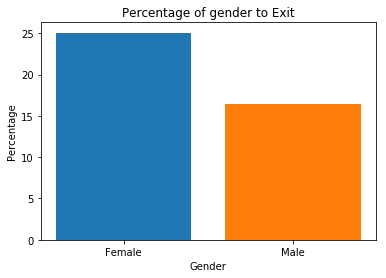

In [25]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])

plt.xticks((0,1), ('Female','Male'))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of gender to Exit")
plt.savefig("9_plot.jpg")
plt.show()

25 % of females and 16 % of males chose to exit.
The difference is not that much but lets just include this column in the dataframe.
Again, this is a judgement you have to make as a data scientist/analyst

#### Lets now decide if the 'Geography' column in relevant by doing similar analysis as above

In [26]:
percentages = []

for country in list(df["Geography"].unique()):
    
    p = round((df["Exited"][df["Geography"]==country].value_counts()[1]/df["Exited"][df["Geography"]==country].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(country,"(% to exit) : ", p)

France (% to exit) :  16.15
Spain (% to exit) :  16.67
Germany (% to exit) :  32.44


<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0x1d5b3d8c198>,
 <a list of 3 Text xticklabel objects>)

Text(0.5,0,'Country')

Text(0,0.5,'Percentage')

Text(0.5,1,'Percentage of Country to Exit')

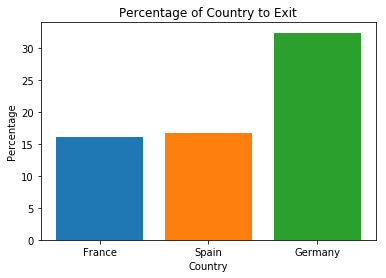

In [27]:
for i in range(len(percentages)):
    plt.bar(i, percentages[i])

plt.xticks((0,1,2), ('France', 'Spain', 'Germany'))
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Percentage of Country to Exit")
plt.savefig("10_plot.jpg")
plt.show()

It can be clearly seen that the customers from Germany left twice as much as the other countries. 
So we should definitely consider this column in our dataframe.

#### Lets now decide if the age column is relevant. This might be a bit over whelming at first but it is simple if you understand it.

Lets start off by plotting a histogram of the 'Age' column

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <a list of 20 Patch objects>)

Text(0.5,0,'Age')

Text(0,0.5,'Frequency')

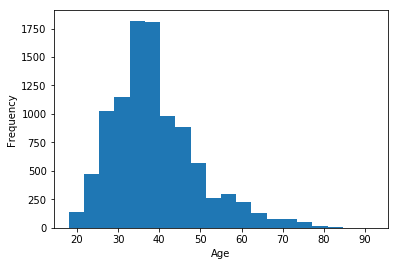

In [12]:
plt.hist(df["Age"],bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('11_plot.jpg')

It can be seen that most of the customers are from the age group '30 to 40'

#### The below scatter plot shows the age of customers(y-axis) who did not quit ('Exited' = 0)

Text(0,0.5,'Age')

Text(0.5,0,'People (rows)')

Text(0.5,1,'People who did not Exit (Exited = 0)')

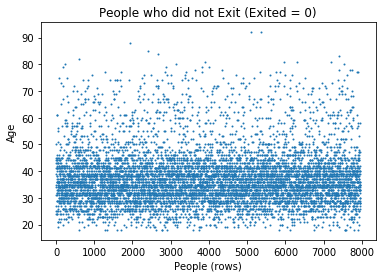

In [13]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==0]))),y=df["Age"][df["Exited"]==0],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who did not Exit (Exited = 0)")
plt.savefig("12_plot.jpg")

we can see that most of the customers who did not quit the bank are in the age group '20 to 45'

#### The below scatter plot shows the age of customers(y-axis) who quit the bank ('Exited' = 1)

Text(0,0.5,'Age')

Text(0.5,0,'People (rows)')

Text(0.5,1,'People who Exited (Exited = 1)')

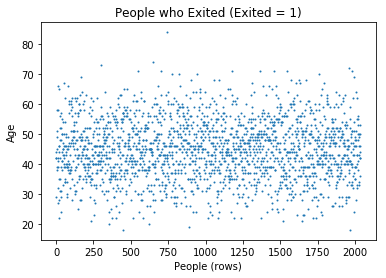

In [14]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==1]))),y=df["Age"][df["Exited"]==1],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who Exited (Exited = 1)")
plt.savefig("13_plot.jpg")

We can see that most of the customers who exited are in the age group '30 to 60'

#### !!! Do not let the above plots fool you !!! 
because we cannot be sure as the customers from the age group '30 to 40' are more in number and thus have a greater impact on the plot (results). If every age group had the same number of people then we could have trusted the above plots

#### The following code gives the "percentage" of people who quit ('Exited' = 1) in each age group

bucketizing the age column and using groupby to create groups for each age group

In [16]:
age_bucket = df.groupby(pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100]))

calculaing the percentage of people who exited and rounding off the result to 2 decimal places

In [17]:
age_bucket = round((age_bucket.sum()["Exited"] / age_bucket.size())*100 , 2)

In [18]:
print(age_bucket)

# percentage of customers in each age group that 'exited'

Age
(10, 20]      5.62
(20, 30]      7.61
(30, 40]     12.09
(40, 50]     33.97
(50, 60]     56.21
(60, 70]     31.42
(70, 80]      8.26
(80, 90]     10.00
(90, 100]     0.00
dtype: float64


Text(0.5,0,'Age Group')

Text(0,0.5,'Percentage exited')

Text(0.5,1,'Percentage of people in different Age Groups that exited')

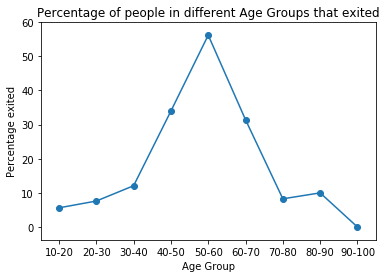

In [20]:
# this is just a plot of the above data

x = [str(i)+"-"+str(i+10) for i in range(10,91,10)]
plt.plot(x,age_bucket.values)
plt.scatter(x,age_bucket.values)
plt.xlabel("Age Group")
plt.ylabel("Percentage exited")
plt.title("Percentage of people in different Age Groups that exited")
plt.savefig("17_plot.jpg")

It can be clearly seen from the above plot that the age group '50 to 60' has the highest percentage of people who quit the bank. We previously might have got misled into thinking that '30 to 60' has the most exited people (from the plots) with the bulk at '40 to 50'.

By the above analysis it is clear that age column is definitely relevant but in the form of buckets. So lets convert the continuous Age column into buckets (categorical). Bucketizing basically means aggregating / putting the values in the corresponding ranges. 

For example, 33 belongs in the range 30-40, 67 belongs in the range 60-70 and so on. The ranges are decided by us, like, for example, we can have ranges 10-20, 20-40, 40-60, ..... or like, 10-35, 35-60, 60-85, .....

In [21]:
df["Age"] = pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100])
df.head()
df.head().to_csv("18_table.csv")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


In [22]:
# dummy encoding the non-numeric columns

df = pd.get_dummies(df)
df.head()
df.head().to_csv("19_table.csv")

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]","Age_(90, 100]"
0,619,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0


#### Removing one column each from the created dummy variables to avoid 'dummy variable trap'

removing the columns in the below list

In [23]:
df = df.drop(columns=["Geography_France","Gender_Female"],axis=1)

removing the bucketized dummy Age column 'Age_(90,100]' by selecting all the columns except the last one

In [24]:
df = df.iloc[:,:-1]
df.head()
df.head().to_csv('21_table.csv')

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]"
0,619,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,1,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,1,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,1,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,1,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,1,0,0,0,0


In [22]:
# Separating the features and labels

feat = df.drop(columns=['Exited'],axis=1)
label = df["Exited"]

In [23]:
# splitting the data for training and testing 

from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(feat, label, test_size=0.3)

Lets scale the data to make the computations easy when we are modelling it. This step is extremely necessary for deep learning models but quite redundant in case of models like XGBoost


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

#### We have successfully cleaned, analysed and prepared the data for modelling

## Part-2. Modeling
We will try out some popular models and compare their accuracies

In [27]:
# importing the confusion matrix metric to find the accuracy of the model

from sklearn.metrics import confusion_matrix

In [28]:
# importing the cross validation function to get a better estimate for accuracy

from sklearn.model_selection import cross_val_score

### Support Vector Machines

In [29]:
from sklearn.svm import SVC

#### Creating classifier object, Fitting training data and Predicting test data

In [30]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# confusion matrix 

cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

[[2322   80]
 [ 348  250]]



#### Calculating the accuracy from the confusion matrix

In [32]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]

denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])

acc_svc = (numerator/denominator) * 100

print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  85.73 %


#### Using cross validation technique to get a better estimate for the accuracy

In [33]:
cross_val_svc = cross_val_score(estimator = SVC(kernel = 'rbf'), X = X_train, y = y_train, cv = 10, n_jobs = -1)

print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  85.03 %


### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

#### Creating classifier object, Fitting training data and Predicting test data

In [35]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
# confusion matrix

cm_random_forest_classifier = confusion_matrix(y_test,y_pred_rfc)
print(cm_random_forest_classifier,end="\n\n")

[[2274  128]
 [ 335  263]]



#### calculating the accuracy from the confusion matrix

In [37]:
numerator = cm_random_forest_classifier[0][0] + cm_random_forest_classifier[1][1]

denominator = sum(cm_random_forest_classifier[0]) + sum(cm_random_forest_classifier[1])

acc_rfc = (numerator/denominator) * 100

print("Accuracy : ",round(acc_rfc,2),"%")

Accuracy :  84.57 %


#### using cross validation function to get a better estimate for the accuracy

In [38]:
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)

print("Cross Validation Accuracy : ",round(cross_val_rfc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  84.69 %


#### XGBoost
This is a 'State of the art' model and will most definitely have the highest accuracy out of all the other models

In [39]:
from xgboost import XGBClassifier

#### Creating classifier object, Fitting training data and Predicting test data

In [40]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
# confusion matrix

cm_xgb_classifier = confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb_classifier,end='\n\n')

[[2322   80]
 [ 331  267]]



#### Calculating the accuracy from the confusion matrix

In [42]:
numerator = cm_xgb_classifier[0][0] + cm_xgb_classifier[1][1]

denominator = sum(cm_xgb_classifier[0]) + sum(cm_xgb_classifier[1])

acc_xgb = (numerator/denominator) * 100

print("Accuracy : ",round(acc_xgb,2),"%")

Accuracy :  86.3 %


#### Using cross validation function to get a better estimate for the accuracy

In [43]:
cross_val_xgb = cross_val_score(estimator=XGBClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)

print("Cross Validation Accuracy : ",round(cross_val_xgb.mean() * 100 , 2),"%")

Cross Validation Accuracy :  85.97 %


It is strange that even the "state of the art" model gave only around 86 % accuracy. Go to the end of this notebook to find out the reason 

#### Now lets try Artificial Neural Networks and see if it can beat XGBoost

In [44]:
import tensorflow as tf

Remember that we copied the un-processed dataframe as 'deep_df'? Here's why. 
The reason for using a non-processed dataframe is because the tensorflow.estimator API will take care of most of the preprocessing hardwork. We dont even have to decide which features to use (we did a lot of work deciding the relevancy of 'age', 'Gender' and 'Geography').

In [45]:
print(deep_df.info())
deep_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
# separating the features and labels

deep_feat = deep_df.drop(columns=["Exited"],axis=1)
deep_label = deep_df["Exited"]

#### List out and separate the continuous(numerical) and categorical columns from the dataframe columns.

This can be done by manually copying and pasting the names of columns but what if the data has like 60 columns? Therefore the below method is easier and scalable

In [47]:
# first just take a look at all the columns

list(deep_feat.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

#### Make a list of columns (excluding 'Exited') where number of unique elements is 2 (i.e., 0 or 1) or if the data type is 'object' represented by 'O' and store them as categorical_columns

In [48]:
categorical_columns = [col for col in deep_feat.columns if len(deep_feat[col].unique())==2 or deep_feat[col].dtype=='O']

#### Make a list of columns (excluding 'Exited') where number of unique elements is greater than 2 and the data type is either 'int64' or 'float64' and store them as continuous_columns

In [49]:
continuous_columns = [col for col in deep_feat.columns if len(deep_feat[col].unique())>2 and (deep_feat[col].dtype=='int64' or deep_feat[col].dtype=='float64')]

In [50]:
print("categorical columns : ", categorical_columns)
print("continuous columns : ", continuous_columns)

categorical columns :  ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
continuous columns :  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


We included the 'Age' column in continuous_columns for now but will later bucketize it (using tensorflow API) and change it into a categorical column. 

Remember all the hardwork we did previously? well, we don't have to do it anymore because tensorflow will take care of everything

In [51]:
# making a train test split
X_T, X_t, y_T, y_t = train_test_split(deep_feat, deep_label, test_size=0.3)

#### Lets now scale the data

First create a list of columns to scale which has all the columns in continuous_columns except 'Age' because we want to convert the 'Age' column into bucketized column

In [52]:
cols_to_scale = continuous_columns[:]
cols_to_scale.remove("Age")

In [53]:
# scaling the listed columns
scaler = StandardScaler()
X_T.loc[:,cols_to_scale] = scaler.fit_transform(X_T.loc[:,cols_to_scale])
X_t.loc[:,cols_to_scale] = scaler.fit_transform(X_t.loc[:,cols_to_scale])

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


The following code is a little confusing at first but lets break it down

We are basically creating feature columns in tensorflow corresponding to each of the columns in the dataframe

#### "tf.feature_column.categorical_column_with_hash_bucket()"  takes in a categorical column like 'Gender' and applies one hot encoding

#### "Hash_bucket_size" is the maximum number of categories in the column (in case of 'Gender', it is only 2 (Male, Female) which is definitely less than 1000)

#### This is then passed into "tf.feature_column.embedding_column()" 

"dimension" parameter takes in the exact number of categories in the column (in 'Gender' it is 2)
embedding column is only used for a dense neural network (simple linear model doesn't require this step)

In [54]:
categorical_object_feat_cols = [tf.feature_column.embedding_column
             (tf.feature_column.categorical_column_with_hash_bucket(key=col,hash_bucket_size=1000),dimension = len(deep_df[col].unique())) 
             for col in categorical_columns if deep_df[col].dtype=='O']

#### "tf.feature_column.categorical_column_with_identity()" is used for categorical columns with integer (or float) dtype 

In [55]:
categorical_integer_feat_cols = [tf.feature_column.embedding_column
             (tf.feature_column.categorical_column_with_identity(key=col,num_buckets=2),dimension = len(deep_df[col].unique())) 
             for col in categorical_columns if deep_df[col].dtype=='int64']

#### "tf.feature_column.numeric_column()" takes in a continuous(numeric) column like 'Balance'

Notice that we excluded 'Age' column because we still need to bucketize it 

In [56]:
continuous_feat_cols = [tf.feature_column.numeric_column(key=col) for col in continuous_columns if col != "Age"]

#### we now take the age column and first make a tensorflow numerical column then we pass it into "tf.feature_column.bucketized_column()" to bucketize it with the given boundaries

In [57]:
age_bucket = tf.feature_column.bucketized_column(tf.feature_column.numeric_column(key="Age"), boundaries=[20,30,40,50,60,70,80,90])

#### Combining all the lists to create a new list of feature columns

In [58]:
feat_cols = categorical_object_feat_cols + \
            categorical_integer_feat_cols + \
            continuous_feat_cols + \
            [age_bucket]
# '\' is just there to support operations in multiple lines. Just ignore that for now

#### Creating functions | pipelines to input the dataset into tensorflow (one for training and one for testing)

In [59]:
input_fun = tf.estimator.inputs.pandas_input_fn(X_T,y_T,batch_size=50,num_epochs=1000,shuffle=True)
pred_input_fun = tf.estimator.inputs.pandas_input_fn(X_t,batch_size=50,shuffle=False)

Lets now make the deep neural network model where 'hidden_units' is the size | shape | architecture of the network (3 layers each containing 10 neurons in our case)

'n_classes' is the number of different labels to classify the data into

In [60]:
DNN_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpgzxzoh9t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D31DE47FD0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Training the dNN model (will take some time)

In [61]:
DNN_model.train(input_fn=input_fun, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmpgzxzoh9t\model.ckpt.
INFO:tensorflow:loss = 33.989582, step = 1
INFO:tensorflow:global_step/sec: 124.687
INFO:tensorflow:loss = 24.86713, step = 101 (0.808 sec)
INFO:tensorflow:global_step/sec: 246.29
INFO:tensorflow:loss = 13.016324, step = 201 (0.408 sec)
INFO:tensorflow:global_step/sec: 235.865
INFO:tensorflow:loss = 15.864867, step = 301 (0.421 sec)
INFO:tensorflow:global_step/sec: 264.551
INFO:tensorflow:loss = 13.176334, step = 401 (0.379 sec)
INFO:tensorflow:global_step/sec: 234.192
INFO:tensorflow:loss = 19.265148, step = 501 (0.427 sec)
INFO:tensorflow:global_step/sec: 227.27
INFO:tensorflow:loss = 20.305151, step = 601 (0.439 sec)
INFO:tensorflow:global_step/sec

Drawing out the predictions of test set from the trained model

#### 'predictions' is a tensorflow object

In [62]:
predictions = DNN_model.predict(pred_input_fun)

We got the predictions as a tensorflow object. Now lets convert it into a list of dictionaries and look at the very first prediction to assess the format of the output

In [63]:
res_pred = list(predictions)
res_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpgzxzoh9t\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-2.552548], dtype=float32),
 'logistic': array([0.0722555], dtype=float32),
 'probabilities': array([0.92774445, 0.0722555 ], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

#### Extracting only the "class_ids" from the list of dictionaries because it is the final verdict that decides the class it belongs to

In [64]:
y_pred = []
for i in range(len(res_pred)):
    y_pred.append(res_pred[i]["class_ids"][0])

Using the sklearn 'classification_report' as a metric for evaluation

In [65]:
from sklearn.metrics import classification_report

In [66]:
rep = classification_report(y_t,y_pred)

### The 'avg / total' gives the final reading of 'precision', 'recall', 'f1-score' and 'support'

In [67]:
print(rep)

             precision    recall  f1-score   support

          0       0.88      0.94      0.91      2399
          1       0.69      0.51      0.59       601

avg / total       0.85      0.86      0.85      3000



It is confusing at first that even the 'state of the art' models like XBGoost and Deep Neural Networks gave only around 85-86 % accuracy (precision).

The reason for this is clearly seen in the above results

It is because the support for the "Exited = 1" is very small compared to the support of "Exited = 0"

#### support means the number of rows corresponding to a value (category) in label

which means our model(any model) can predict "Exited = 0" very accurately because of large support
but when it comes to predicting "Exited = 1" our model doesnot perform very well because the support is low

i.e., the number of rows with "Exited = 1" is low which results in poor / insufficient training

### Final conclusion : 
The accuracy of the model cannot be increased significantly than what we have now because the data itself is not sufficient and doesn't seem to have much correlation between features and labels

# If you want to save the model and deploy it sometime in the future then check out my other notebook | post which is dedicated to this task